In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('../trained_models/model1/m06c_test1')

In [3]:
input_technique_data_sources =         tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_data_sources')
input_technique_detection_name =       tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_detection_name')
input_technique_mitigation_id =        tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_mitigation_id')
input_technique_platforms =            tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_platforms')
input_technique_software_id =          tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_software_id')
input_technique_tactics =              tf.keras.Input(shape=(None,), ragged=True, dtype= tf.string, name = 'input_technique_tactics')
input_technique_interaction_rate =     tf.keras.Input(shape=(1,), dtype=tf.float32, name='input_technique_interaction_rate')
input_technique_description =          tf.keras.Input(shape=(768,), dtype=tf.float32, name='input_technique_description')

vectorize_software_id =              model.vectorize_software_id
vectorize_tactics =              model.vectorize_tactics
vectorize_technique_data_sources =         model.vectorize_technique_data_sources
vectorize_technique_detection_name =       model.vectorize_technique_detection_name
vectorize_technique_mitigation_id =        model.vectorize_technique_mitigation_id
vectorize_technique_platforms =            model.vectorize_technique_platforms

embed_software_id =              model.embed_software_id
embed_tactics =                model.embed_tactics
embed_technique_data_sources =         model.embed_technique_data_sources
embed_technique_detection_name =       model.embed_technique_detection_name
embed_technique_mitigation_id =        model.embed_technique_mitigation_id
embed_technique_platforms =            model.embed_technique_platforms

concatenate = tf.keras.layers.Concatenate (axis=1)

technique_nn = model.Technique_NN

In [4]:
sub_model_data_sources = tf.keras.models.Sequential(
    [
        input_technique_data_sources,
        vectorize_technique_data_sources,
        embed_technique_data_sources
    ]
)
sub_model_detection_name = tf.keras.models.Sequential(
    [
        input_technique_detection_name,
        vectorize_technique_detection_name,
        embed_technique_detection_name
    ]
)
sub_model_mitigation_id = tf.keras.models.Sequential(
    [
        input_technique_mitigation_id,
        vectorize_technique_mitigation_id,
        embed_technique_mitigation_id
    ]
)
sub_model_platforms = tf.keras.models.Sequential(
    [
        input_technique_platforms,
        vectorize_technique_platforms,
        embed_technique_platforms
    ]
)
sub_model_software_id = tf.keras.models.Sequential(
    [
        input_technique_software_id,
        vectorize_software_id,
        embed_software_id
    ]
)
sub_model_tactics = tf.keras.models.Sequential(
    [
        input_technique_tactics,
        vectorize_tactics,
        embed_tactics
    ]
)

technique_data_sources = tf.reduce_mean (sub_model_data_sources.output, axis = 1)
technique_detection_name = tf.reduce_mean (sub_model_detection_name.output, axis = 1)
technique_mitigation_id = tf.reduce_mean (sub_model_mitigation_id.output, axis = 1)
technique_platforms = tf.reduce_mean (sub_model_platforms.output, axis = 1)
technique_software_id = tf.reduce_mean (sub_model_software_id.output, axis = 1)
technique_tactics = tf.reduce_mean (sub_model_tactics.output, axis = 1)

technique_concat = tf.keras.layers.Concatenate(axis=-1)

concatenated_features = technique_concat (
    [
    input_technique_interaction_rate,
    input_technique_description,
    technique_data_sources,
    technique_detection_name,
    technique_mitigation_id,
    technique_platforms,
    technique_software_id,
    technique_tactics, 
    ]
)
sub_model_technique_nn = model.Technique_NN
norm_output_Technique = tf.linalg.l2_normalize (concatenated_features, axis = 1)
learned_feature = sub_model_technique_nn(norm_output_Technique)

sub_model = tf.keras.models.Model (
    inputs = {
        'input_technique_interaction_rate' : input_technique_interaction_rate,
        'input_technique_description' : input_technique_description,
        'input_technique_data_sources' : input_technique_data_sources,
        'input_technique_detection_name' : input_technique_detection_name,
        'input_technique_mitigation_id' : input_technique_mitigation_id,
        'input_technique_platforms' : input_technique_platforms,
        'input_technique_software_id' : input_technique_software_id,
        'input_technique_tactics' : input_technique_tactics,
    },
    outputs = learned_feature
)

In [5]:
sub_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_technique_data_sources (  [(None, None)]      0           []                               
 InputLayer)                                                                                      
                                                                                                  
 input_technique_detection_name  [(None, None)]      0           []                               
  (InputLayer)                                                                                    
                                                                                                  
 input_technique_mitigation_id   [(None, None)]      0           []                               
 (InputLayer)                                                                                 

In [6]:
from tensorflow.keras.utils import plot_model

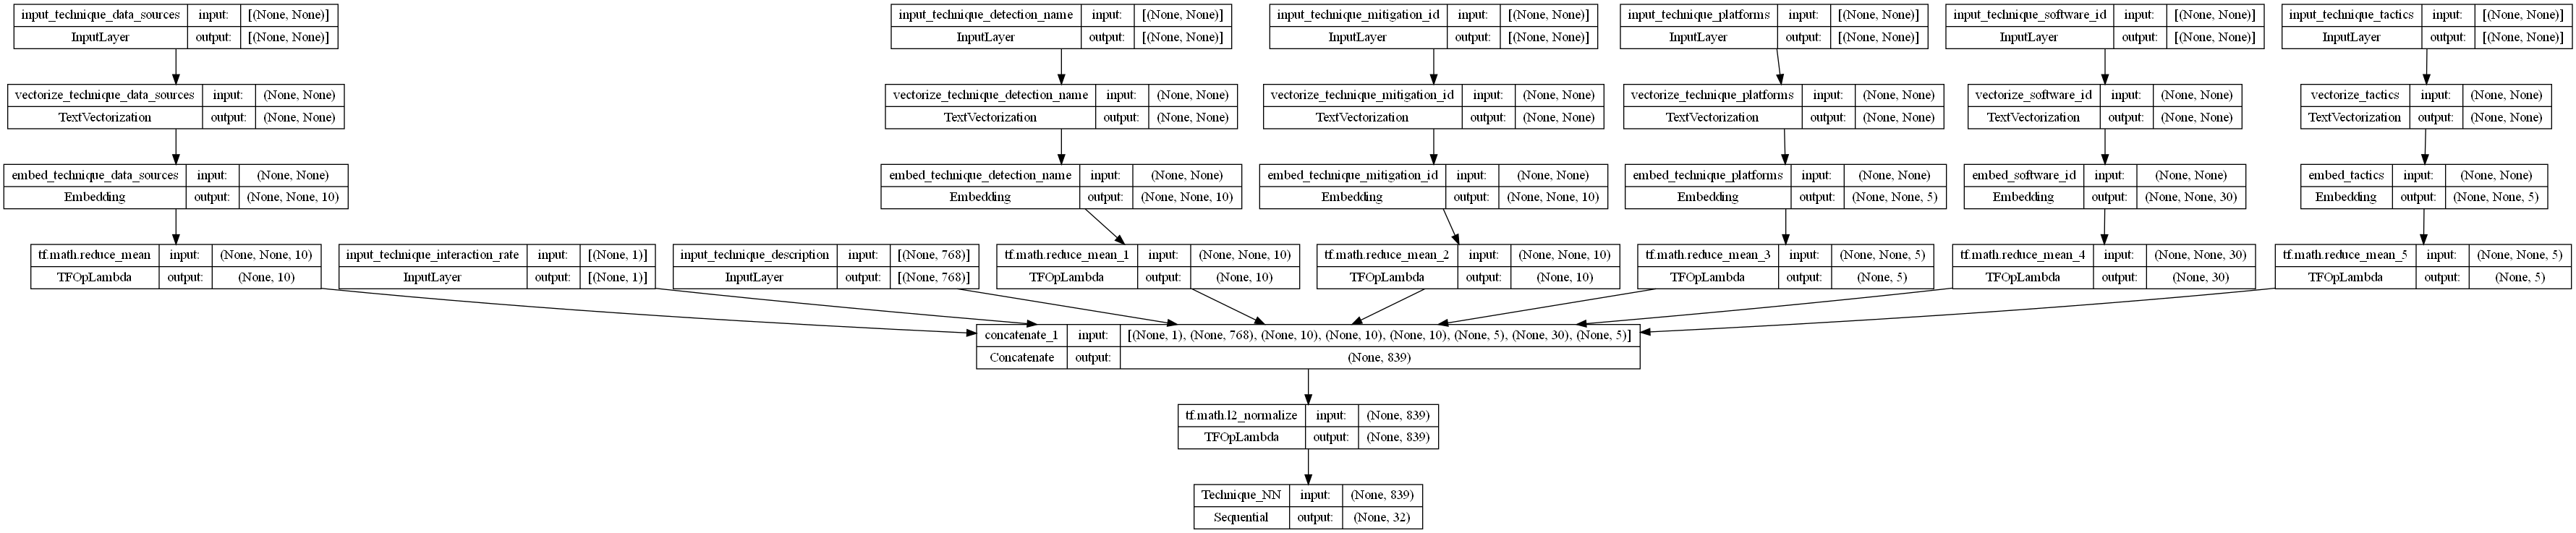

In [7]:
plot_model(sub_model, to_file='sequential_model.png', show_shapes=True)

In [8]:
import sys
sys.path.append ('..')
from src.models.model1.model_preprocess import build_technique_dataset
import pandas as pd
technique_features_df = pd.read_pickle ('../data/processed/model1/processed_technnique_features.pkl')
input_technique = build_technique_dataset (technique_features_df)

In [9]:
input_technique = input_technique.batch(32)
learned_features = sub_model.predict (input_technique)

19/19 [==============================] - 0s 6ms/step


In [10]:
learned_features

array([[-0.24919215,  0.3436671 , -0.1834493 , ..., -0.13776925,
         0.185505  , -0.27023497],
       [-0.14773232,  0.24953139, -0.1346279 , ..., -0.08917151,
         0.13039696, -0.18765078],
       [-0.3264329 ,  0.42551842, -0.2434816 , ..., -0.17430028,
         0.24131157, -0.32005173],
       ...,
       [-0.24162297,  0.34018514, -0.19888432, ..., -0.12350304,
         0.17708237, -0.28619835],
       [ 0.04419352,  0.07299781,  0.0404011 , ...,  0.03566848,
         0.0358068 , -0.00858832],
       [-0.21118696,  0.29723656, -0.15976684, ..., -0.11651477,
         0.16614299, -0.22070758]], dtype=float32)

---

In [11]:
learned_features.shape

(607, 32)

# Similarity Matrix

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity (learned_features)
similarity_matrix.shape

(607, 607)

<Figure size 576x432 with 0 Axes>

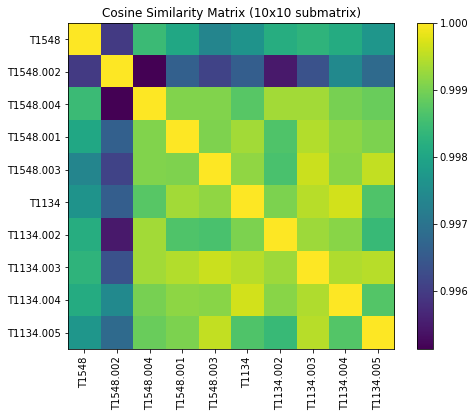

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
n = 10
id_list = list (technique_features_df['technique_ID'])
submatrix = similarity_matrix[:n, :n]
sub_id_list = id_list[:n]  # IDs corresponding to the submatrix

# Visualize the submatrix as a heatmap with row and column IDs displayed
plt.figure(figsize=(8, 6))
plt.imshow(submatrix, cmap='viridis', interpolation='nearest')
plt.title(f'Cosine Similarity Matrix ({n}x{n} submatrix)')
plt.colorbar()
plt.xticks(ticks=np.arange(n), labels=sub_id_list, rotation=90)  # Set x-axis ticks as IDs
plt.yticks(ticks=np.arange(n), labels=sub_id_list)  # Set y-axis ticks as IDs
# plt.xlabel('Samples')
# plt.ylabel('Samples')
plt.show()

In [14]:
submatrix 

array([[0.99999994, 0.9959602 , 0.9984426 , 0.99803007, 0.9973565 ,
        0.9976283 , 0.9981722 , 0.99829614, 0.99813   , 0.99768597],
       [0.9959602 , 1.        , 0.99513525, 0.9966216 , 0.9961166 ,
        0.9965905 , 0.995466  , 0.9963698 , 0.99743724, 0.99681383],
       [0.9984426 , 0.99513525, 1.        , 0.9990696 , 0.999073  ,
        0.9987368 , 0.99932617, 0.9993344 , 0.9990059 , 0.9988865 ],
       [0.99803007, 0.9966216 , 0.9990696 , 0.9999999 , 0.99905455,
        0.9993278 , 0.998657  , 0.9994471 , 0.9991661 , 0.9990425 ],
       [0.9973565 , 0.9961166 , 0.999073  , 0.99905455, 1.0000001 ,
        0.999199  , 0.99860317, 0.9996105 , 0.9991344 , 0.99956286],
       [0.9976283 , 0.9965905 , 0.9987368 , 0.9993278 , 0.999199  ,
        1.        , 0.9990348 , 0.9994757 , 0.99967647, 0.998655  ],
       [0.9981722 , 0.995466  , 0.99932617, 0.998657  , 0.99860317,
        0.9990348 , 0.99999994, 0.9992964 , 0.9991398 , 0.9984136 ],
       [0.99829614, 0.9963698 , 0.9993344

In [15]:
technique_features_df.iloc[0:4]

,technique_ID,input_technique_data_sources,input_technique_detection_name,input_technique_mitigation_id,input_technique_platforms,input_technique_software_id,input_technique_tactics,input_technique_description,input_technique_interaction_rate
0,T1548,"[command_command_execution, file_file_metadata...","[command_execution, file_metadata, file_modifi...","[m1047, m1038, m1028, m1026, m1022, other]","[linux, windows, macos]",[],"[defense_evasion, privilege_escalation]","[-0.36630338, -0.24036503, -0.36260876, 0.0984...",-0.516771
1,T1548.002,"[command_command_execution, process_process_cr...","[command_execution, process_creation, windows_...","[m1047, m1026, other]",[windows],"[s0584, s0640, s0606, s0570, s1068, s0089, s10...","[defense_evasion, privilege_escalation]","[-0.5305501, -0.43114784, -0.67361057, 0.16222...",0.420987
2,T1548.004,"[process_os_api_execution, process_process_cre...","[os_api_execution, process_creation]",[m1038],[macos],[s0402],"[defense_evasion, privilege_escalation]","[-0.57463825, -0.65824693, -0.23797776, -0.254...",-0.516771
3,T1548.001,"[command_command_execution, file_file_metadata...","[command_execution, file_metadata, file_modifi...",[m1028],"[linux, macos]",[other],"[defense_evasion, privilege_escalation]","[-0.7420097, -0.461457, -0.45979652, -0.116038...",-0.516771


- sorting index by largest value, stored in 2d list

In [16]:
import numpy as np

# Let's say your 2D array is named 'array' with shape (m, n)
# For demonstration, let's create a sample 2D array
array = similarity_matrix

# Get the shape of the array
m, n = array.shape

# Create an empty list to store the sorted indices for each vector
sorted_indices_desc_list = []

# Loop through each row (1D vector) in the 2D array
for i in range(m):
    # sorted_indices_desc = np.argsort(array[i])[::-1]
    sorted_indices_desc = np.argsort(array[i])[::-1]
    sorted_indices_desc_list.append(sorted_indices_desc)



In [17]:
submatrix

array([[0.99999994, 0.9959602 , 0.9984426 , 0.99803007, 0.9973565 ,
        0.9976283 , 0.9981722 , 0.99829614, 0.99813   , 0.99768597],
       [0.9959602 , 1.        , 0.99513525, 0.9966216 , 0.9961166 ,
        0.9965905 , 0.995466  , 0.9963698 , 0.99743724, 0.99681383],
       [0.9984426 , 0.99513525, 1.        , 0.9990696 , 0.999073  ,
        0.9987368 , 0.99932617, 0.9993344 , 0.9990059 , 0.9988865 ],
       [0.99803007, 0.9966216 , 0.9990696 , 0.9999999 , 0.99905455,
        0.9993278 , 0.998657  , 0.9994471 , 0.9991661 , 0.9990425 ],
       [0.9973565 , 0.9961166 , 0.999073  , 0.99905455, 1.0000001 ,
        0.999199  , 0.99860317, 0.9996105 , 0.9991344 , 0.99956286],
       [0.9976283 , 0.9965905 , 0.9987368 , 0.9993278 , 0.999199  ,
        1.        , 0.9990348 , 0.9994757 , 0.99967647, 0.998655  ],
       [0.9981722 , 0.995466  , 0.99932617, 0.998657  , 0.99860317,
        0.9990348 , 0.99999994, 0.9992964 , 0.9991398 , 0.9984136 ],
       [0.99829614, 0.9963698 , 0.9993344

In [18]:
sorted_indices_desc_list

[array([  0,  53, 220, 233, 311, 141, 139, 140, 426, 247, 138, 428, 107,
         33, 299, 257, 302, 164, 434, 267, 133, 438, 162, 578,  83, 115,
        305, 442, 261, 500, 354, 185, 569, 430, 292, 229,  25, 441, 435,
         79, 190, 175, 405,  57, 362, 344, 519, 256, 173, 281,  37, 196,
        227,  96, 142, 348, 361, 359,  24, 324,  17, 599, 384,  81, 195,
        360, 537, 563, 467, 145, 505, 598, 114, 528, 266,  34, 153, 113,
        316, 228, 118, 403, 427,  76, 497, 252,  60, 265, 495, 603, 323,
        345,  30, 117, 370, 477, 493, 254, 363, 325, 431, 464,  43, 353,
        119,  73, 469, 109, 124, 429, 474, 216, 296, 439, 436, 443, 284,
        272, 575, 460, 482, 151,  49,  44,  31, 473, 246, 203, 253, 286,
        332, 356, 476, 163, 535, 198, 231,  21, 174, 369, 248, 378, 166,
        285, 274, 560, 565, 445, 237, 111, 558, 379,  63, 564, 314, 144,
        211, 459, 230, 312,  58, 511, 277,  62, 186, 391, 488, 255,  56,
        167, 297, 451, 143,  61, 570, 437,  59, 110

In [19]:
look_up_table = pd.DataFrame (
    {
        'technique_ID' : id_list,
        'sorted_indices' : sorted_indices_desc_list
    }
)

In [20]:
look_up_table

,technique_ID,sorted_indices
0,T1548,"[0, 53, 220, 233, 311, 141, 139, 140, 426, 247..."
1,T1548.002,"[1, 204, 455, 317, 568, 523, 183, 309, 374, 60..."
2,T1548.004,"[2, 526, 544, 539, 216, 110, 31, 429, 518, 492..."
3,T1548.001,"[3, 179, 88, 170, 453, 406, 246, 306, 285, 63,..."
4,T1548.003,"[4, 7, 178, 9, 377, 279, 515, 298, 499, 187, 1..."
...,...,...
602,T1102.002,"[602, 452, 241, 289, 304, 339, 543, 239, 601, ..."
603,T1102.001,"[603, 281, 360, 83, 344, 62, 353, 146, 85, 305..."
604,T1102.003,"[604, 183, 457, 231, 398, 360, 581, 579, 295, ..."
605,T1047,"[605, 27, 95, 371, 498, 358, 50, 235, 461, 318..."


In [21]:
def technique_index_id_map(lst):
    return [id_list[i] for i in lst]
look_up_table['sorted_similar_techniques'] = look_up_table['sorted_indices'].apply (technique_index_id_map)

In [22]:
look_up_table

,technique_ID,sorted_indices,sorted_similar_techniques
0,T1548,"[0, 53, 220, 233, 311, 141, 139, 140, 426, 247...","[T1548, T1020, T1480, T1567.001, T1070, T1565...."
1,T1548.002,"[1, 204, 455, 317, 568, 523, 183, 309, 374, 60...","[T1548.002, T1546.008, T1563, T1070.001, T1199..."
2,T1548.004,"[2, 526, 544, 539, 216, 110, 31, 429, 518, 492...","[T1548.004, T1553.003, T1218.012, T1218.007, T..."
3,T1548.001,"[3, 179, 88, 170, 453, 406, 246, 306, 285, 63,...","[T1548.001, T1484.001, T1580, T1587.004, T1620..."
4,T1548.003,"[4, 7, 178, 9, 377, 279, 515, 298, 499, 187, 1...","[T1548.003, T1134.003, T1484.002, T1134.005, T..."
...,...,...,...
602,T1102.002,"[602, 452, 241, 289, 304, 339, 543, 239, 601, ...","[T1102.002, T1012, T1133, T1574.002, T1562.001..."
603,T1102.001,"[603, 281, 360, 83, 344, 62, 353, 146, 85, 305...","[T1102.001, T1564.004, T1601.002, T1110.001, T..."
604,T1102.003,"[604, 183, 457, 231, 398, 360, 581, 579, 295, ...","[T1102.003, T1568.003, T1563.001, T1567, T1588..."
605,T1047,"[605, 27, 95, 371, 498, 358, 50, 235, 461, 318...","[T1047, T1583.001, T1059.007, T1046, T1505.003..."
